In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## There are a lot of games releasing in a year, so I created a system which would recommend me a game based on my mood

The dataset named Video Game Sales with Ratings contains a collection of more than 16000 data which lists video games with sales above 100,000 copy.Data collection is done by web scraping technique. The script used in the web scraping process can be seen on GitHub.

Name : Name of the game
Platform : Console on which the game is running
Year_of_Release : Year of the game released
Genre : Game's category
Publisher : Publisher
NA_Sales : Game sales in North America (in millions of units)
EU_Sales : Game sales in the European Union (in millions of units)
JP_Sales : Game sales in Japan (in millions of units)
Other_Sales : Game sales in the rest of the world
Global_Sales : Total sales in the world (in millions of units)
Critic_Score : Aggregate score compiled by Metacritic staff
Critic_Count : The number of critics used in coming up with the Critic_score
User_Score : Score by Metacritic's subscribers
User_Count : Number of Metacritic's subscribers who gave the user_score
Developer : Party responsible for creating the game
Rating : The ESRB ratings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

In [3]:
games = pd.read_csv("/kaggle/input/video-game-sales-with-ratings/Video_Games_Sales_as_at_22_Dec_2016.csv")
games


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print("DataFrame size:", games.shape)

DataFrame size: (16719, 16)


## Data Cleaning

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
games.drop(['Publisher',
            'NA_Sales',
            'EU_Sales',
            'JP_Sales',
            'Other_Sales',
            'Critic_Count',
            'User_Score',
            'User_Count',
            'Developer',
            'Rating'], axis=1, inplace=True)
print("DataFrame size after dropping column:", games.shape)

DataFrame size after dropping column: (16719, 6)


In [7]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Global_Sales          0
Critic_Score       8582
dtype: int64

In [8]:
games[games.isnull().any(axis=1)].head(3)

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score
1,Super Mario Bros.,NES,1985.0,Platform,40.24,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,31.37,NaN
5,Tetris,GB,1989.0,Puzzle,30.26,NaN


In [9]:
games.dropna(inplace=True)
print("DataFrame size before cleaning:", games.shape)

DataFrame size before cleaning: (7983, 6)


In [10]:
games.duplicated().sum()

0

In [11]:
games.drop_duplicates(inplace=True)
print("DataFrame size after cleaning:", games.shape)

DataFrame size after cleaning: (7983, 6)


In [42]:
print("Different Platforms:", games['Platform'].unique())

Different Platforms: ['Wii' 'DS' 'X360' 'Multi_Platform' 'PS2' '3DS' 'PS' 'PS3' 'WiiU' 'GC'
 'GBA' 'PC' 'PSP' 'PS4' 'XOne' 'XB' 'PSV' 'DC']


In [45]:
games['Platform_General']= games['Platform']

In [46]:
games.loc[games['Platform'] == 'Wii', 'Platform_General'] = 'Nintendo'
games.loc[games['Platform'] == 'DS', 'Platform_General'] = 'Nintendo'
games.loc[games['Platform'] == 'X360', 'Platform_General'] = 'Microsoft_Xbox'
games.loc[games['Platform'] == 'PS3', 'Platform_General'] = 'Sony_Playstation' 
games.loc[games['Platform'] == 'PS2', 'Platform_General'] = 'Sony_Playstation'
games.loc[games['Platform'] == '3DS', 'Platform_General'] = 'Nintendo'
games.loc[games['Platform'] == 'PS4', 'Platform_General'] = 'Sony_Playstation'
games.loc[games['Platform'] == 'PS', 'Platform_General'] = 'Sony_Playstation' 
games.loc[games['Platform'] == 'XB', 'Platform_General'] = 'Microsoft_Xbox'
games.loc[games['Platform'] == 'PC', 'Platform_General'] = 'PC'
games.loc[games['Platform'] == 'PSP', 'Platform_General'] = 'Sony_Playstation'
games.loc[games['Platform'] == 'WiiU', 'Platform_General'] = 'Nintendo'
games.loc[games['Platform'] == 'GC', 'Platform_General'] = 'Nintendo'
games.loc[games['Platform'] == 'GBA', 'Platform_General'] = 'Nintendo'
games.loc[games['Platform'] == 'XOne', 'Platform_General'] = 'Microsoft_Xbox'
games.loc[games['Platform'] == 'PSV', 'Platform_General'] = 'Sony_Playstation'
games.loc[games['Platform'] == 'DC', 'Platform_General'] = 'Sega'


In [47]:
games.head()

,Name,Platform,Platform_General,Year_of_Release,Genre,Global_Sales,Critic_Score
0,Wii Sports,Wii,Nintendo,2006,Sports,82.53,76
1,Mario Kart Wii,Wii,Nintendo,2008,Racing,35.52,82
2,Wii Sports Resort,Wii,Nintendo,2009,Sports,32.77,80
3,New Super Mario Bros.,DS,Nintendo,2006,Platform,29.80,89
4,Wii Play,Wii,Nintendo,2006,Misc,28.92,58


In [48]:
print("Different :", games['Platform_General'].unique())

Different : ['Nintendo' 'Microsoft_Xbox' 'Multi_Platform' 'Sony_Playstation' 'PC'
 'Sega']


In [49]:
games['Year_of_Release'] = games['Year_of_Release'].astype(int).astype(object)
games['Critic_Score'] = games['Critic_Score'].astype(int)

In [50]:
duplicated_index = games[games.duplicated('Name', keep=False)].index.tolist()
games.loc[duplicated_index, "Platform"] = "Multi_Platform"
games.loc[duplicated_index, "Platform_General"] = "Multi_Platform"
games.loc[games['Genre'] == 'Role-Playing', 'Genre'] = 'Role_Playing'

In [51]:
games['Global_Sales'] = games.groupby(['Name'])['Global_Sales'].transform('sum')
games = games.drop_duplicates(subset=['Name'])

In [52]:
games = games.reindex(columns=['Name','Platform','Platform_General','Year_of_Release','Genre','Global_Sales','Critic_Score'])
games = games.reset_index(drop=True)

In [53]:
games.sample(5)

,Name,Platform,Platform_General,Year_of_Release,Genre,Global_Sales,Critic_Score
167,Gran Turismo 5 Prologue,PS3,Sony_Playstation,2007,Racing,4.19,80
149,Splatoon,WiiU,Nintendo,2015,Shooter,4.43,81
4621,Greg Hastings Paintball 2,PS3,Sony_Playstation,2010,Shooter,0.04,46
1764,Dragon Ball Z: Supersonic Warriors,GBA,Nintendo,2004,Fighting,0.51,73
2500,NES Remix,WiiU,Nintendo,2014,Action,0.28,71


## Exploring Data

In [54]:
games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5031 entries, 0 to 5030
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              5031 non-null   object 
 1   Platform          5031 non-null   object 
 2   Platform_General  5031 non-null   object 
 3   Year_of_Release   5031 non-null   object 
 4   Genre             5031 non-null   object 
 5   Global_Sales      5031 non-null   float64
 6   Critic_Score      5031 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 275.3+ KB


In [56]:
games.nunique()


Name                5031
Platform              18
Platform_General       6
Year_of_Release       24
Genre                 12
Global_Sales         752
Critic_Score          79
dtype: int64

In [57]:
games.describe()


,Global_Sales,Critic_Score
count,5031.000000,5031.000000
mean,1.100358,68.579209
std,2.726911,14.299440
min,0.010000,19.000000
25%,0.110000,60.000000
50%,0.320000,70.000000
75%,1.060000,79.000000
max,82.530000,98.000000


                Total Sample  percentage
Multi_Platform          1665       33.09
PS2                      587       11.67
DS                       487        9.68
PC                       308        6.12
GBA                      300        5.96
Wii                      285        5.66
PSP                      257        5.11
XB                       204        4.05
X360                     181        3.60
PS                       163        3.24
PS3                      149        2.96
3DS                      121        2.41
GC                       116        2.31
PS4                       72        1.43
PSV                       60        1.19
WiiU                      43        0.85
XOne                      21        0.42
DC                        12        0.24


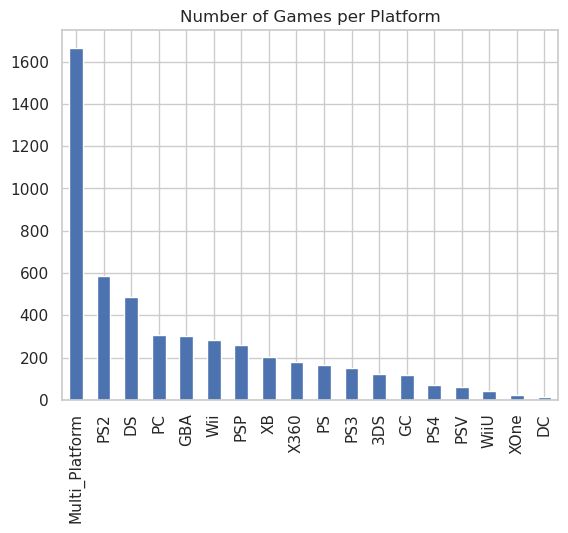

In [62]:
count = games['Platform'].value_counts()
percent = 100*games['Platform'].value_counts(normalize=True)
df = pd.DataFrame({'Total Sample':count, 'percentage':percent.round(2)})
print(df)
count.plot(kind='bar', title="Number of Games per Platform");

                  Total  Persentage
Multi_Platform     1665       33.09
Nintendo           1352       26.87
Sony_Playstation   1288       25.60
Microsoft_Xbox      406        8.07
PC                  308        6.12
Sega                 12        0.24


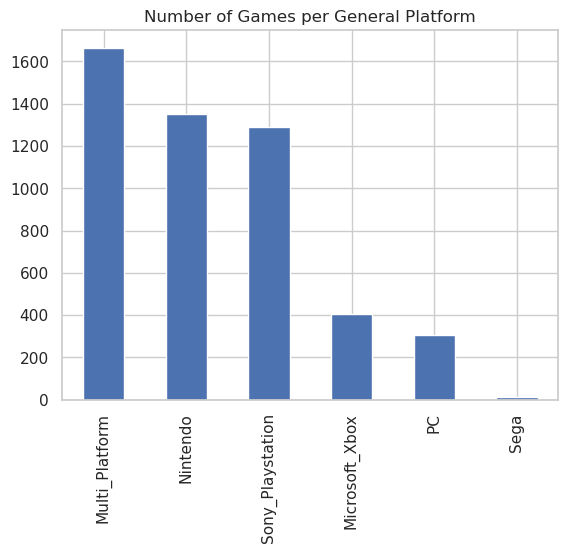

In [63]:
count = games['Platform_General'].value_counts()
percent = 100*games['Platform_General'].value_counts(normalize=True)
df = pd.DataFrame({'Total':count, 'Persentage':percent.round(2)})
print(df)
count.plot(kind='bar', title="Number of Games per General Platform");

      Total  percentage
1985      1        0.02
1988      1        0.02
1994      1        0.02
1996      7        0.14
1997     17        0.34
1998     27        0.54
1999     39        0.78
2000    131        2.60
2001    274        5.45
2002    428        8.51
2003    363        7.22
2004    360        7.16
2005    410        8.15
2006    397        7.89
2007    421        8.37
2008    456        9.06
2009    393        7.81
2010    295        5.86
2011    285        5.66
2012    179        3.56
2013    144        2.86
2014    140        2.78
2015    135        2.68
2016    127        2.52


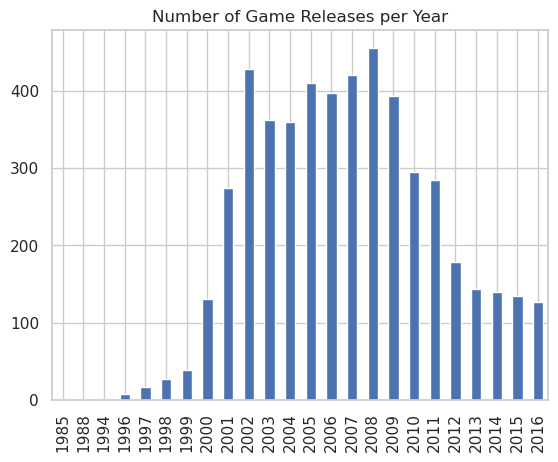

In [64]:
count = games['Year_of_Release'].value_counts().sort_index()
percent = 100*games['Year_of_Release'].value_counts(normalize=True)
df = pd.DataFrame({'Total':count, 'percentage':percent.round(2)})
print(df)
count.plot(kind='bar', title="Number of Game Releases per Year");

              Total  Percentage
Action          972       19.32
Sports          607       12.07
Role_Playing    602       11.97
Shooter         540       10.73
Racing          426        8.47
Misc            353        7.02
Platform        310        6.16
Simulation      275        5.47
Fighting        269        5.35
Adventure       246        4.89
Strategy        242        4.81
Puzzle          189        3.76


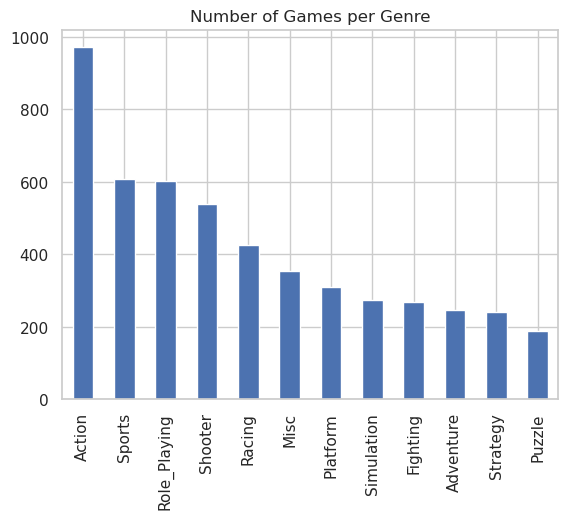

In [65]:
count = games['Genre'].value_counts()
percent = 100*games['Genre'].value_counts(normalize=True)
df = pd.DataFrame({'Total':count, 'Percentage':percent.round(2)})
print(df)
count.plot(kind='bar', title="Number of Games per Genre");

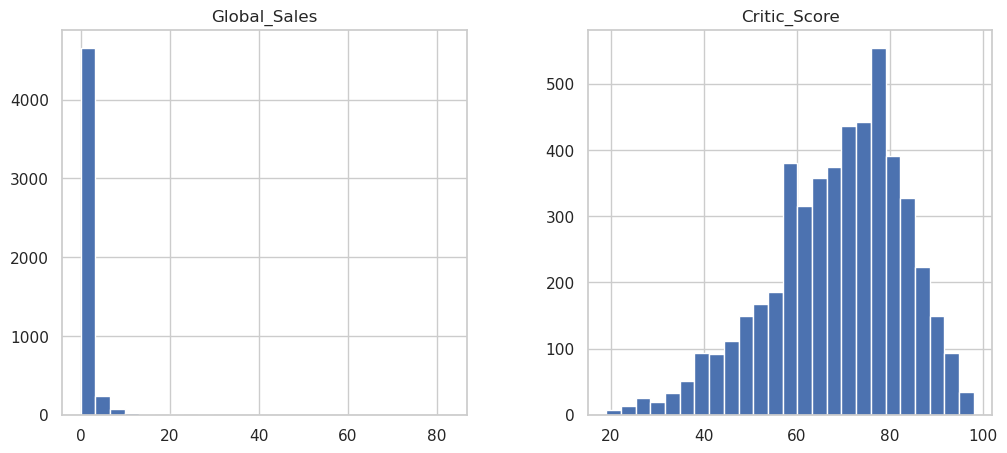

In [66]:
games.hist(bins=25, figsize=(12,5))
plt.show()

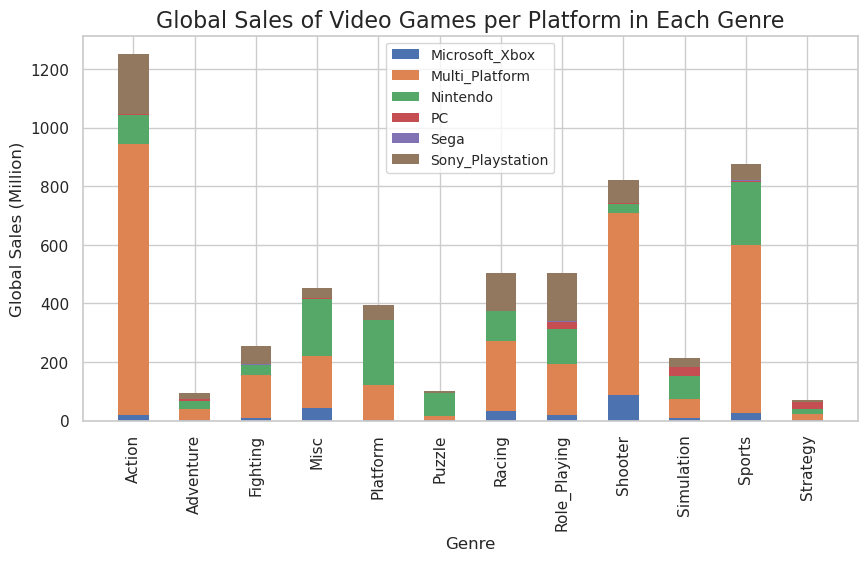

In [67]:
df = games.groupby(['Genre','Platform_General']).Global_Sales.sum()
df.unstack().plot.bar(stacked=True, linewidth=0, figsize=(10,5))
plt.title('Global Sales of Video Games per Platform in Each Genre', size=16)
plt.ylabel('Global Sales (Million)')
plt.xlabel('Genre')
plt.legend(loc=9, prop={'size': 10})
plt.autoscale()
plt.show()

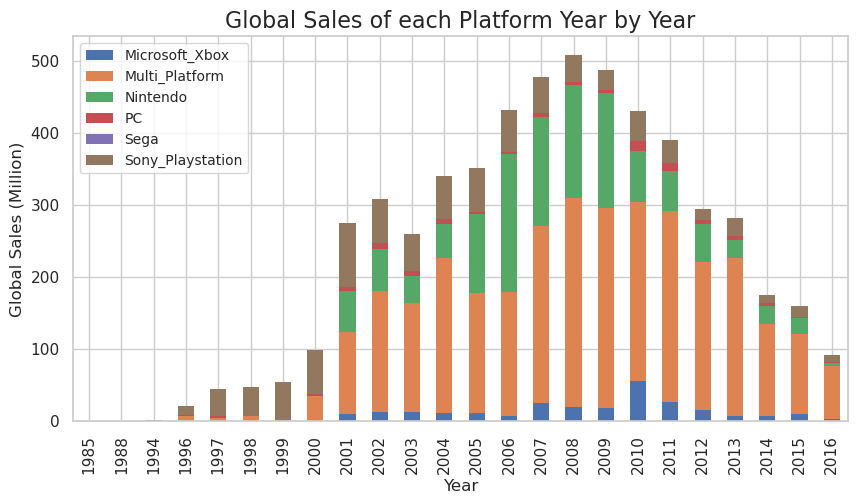

In [68]:
df = games.groupby(['Year_of_Release','Platform_General']).Global_Sales.sum()
df.unstack().plot.bar(stacked=True, linewidth=0, figsize=(10,5))
plt.title('Global Sales of each Platform Year by Year', size=16)
plt.ylabel('Global Sales (Million)')
plt.xlabel('Year')
plt.legend(loc=2, prop={'size': 10})
plt.show()

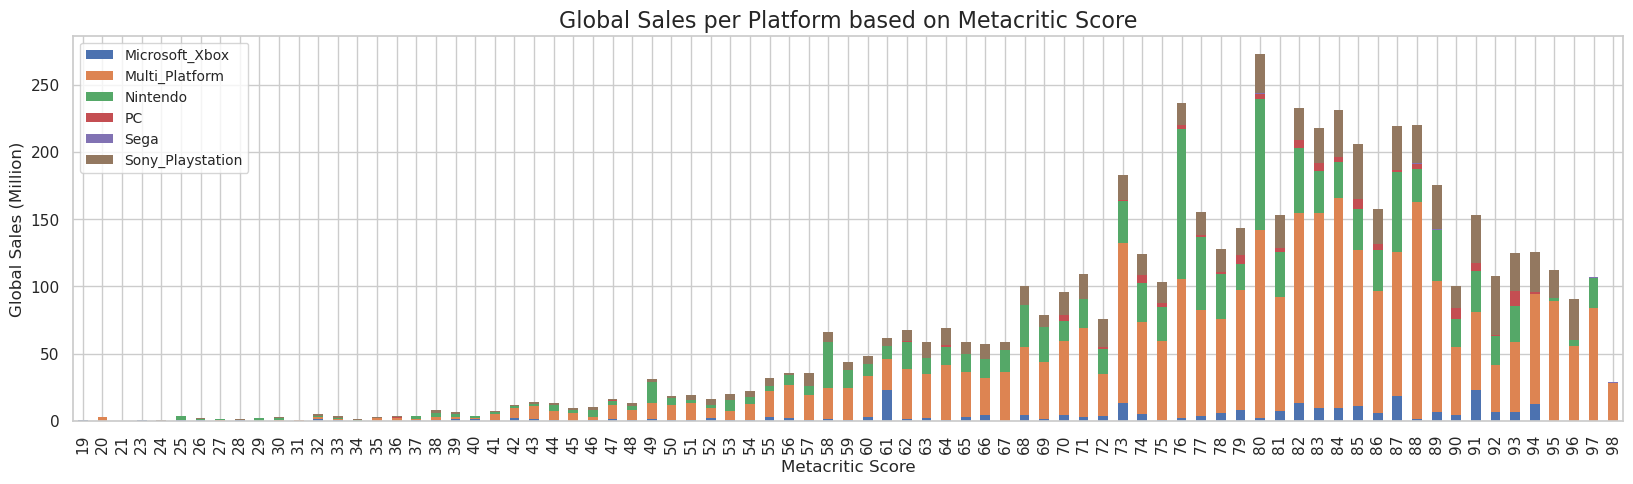

In [69]:
df = games.groupby(['Critic_Score','Platform_General']).Global_Sales.sum()
df.unstack().plot.bar(stacked=True, linewidth=0, figsize=(20,5))
plt.title('Global Sales per Platform based on Metacritic Score', size=16)
plt.ylabel('Global Sales (Million)')
plt.xlabel('Metacritic Score')
plt.legend(loc=2, prop={'size': 10})
plt.show()


## Development

In [70]:
dataset = games.copy()
dataset.sample(10)

,Name,Platform,Platform_General,Year_of_Release,Genre,Global_Sales,Critic_Score
1943,Ben 10 Alien Force: Vilgax Attacks,Multi_Platform,Multi_Platform,2009,Action,0.66,65
3096,MindJack,Multi_Platform,Multi_Platform,2011,Shooter,0.27,44
823,Ninja Gaiden,XB,Microsoft_Xbox,2004,Action,1.23,91
1643,God of War: Origins Collection,PS3,Sony_Playstation,2011,Action,0.55,84
2993,SpongeBob SquigglePants 3D,3DS,Nintendo,2011,Misc,0.19,64
460,Sonic Mega Collection,GC,Nintendo,2002,Misc,2.05,75
3448,Shaman King: Power of Spirit,PS2,Sony_Playstation,2004,Adventure,0.13,54
1638,Frontlines: Fuel of War,Multi_Platform,Multi_Platform,2008,Shooter,0.58,75
3614,NBA Jam 2002,GBA,Nintendo,2002,Sports,0.11,49
3165,Green Lantern: Rise of the Manhunters,Multi_Platform,Multi_Platform,2011,Action,0.52,61


In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
tf = TfidfVectorizer()
tf.fit(dataset['Genre']) 
tf.get_feature_names() 

['action',
 'adventure',
 'fighting',
 'misc',
 'platform',
 'puzzle',
 'racing',
 'role_playing',
 'shooter',
 'simulation',
 'sports',
 'strategy']

In [72]:
tfidf_matrix = tf.fit_transform(dataset['Genre']) 
tfidf_matrix.shape 


(5031, 12)

In [73]:
tfidf_matrix.todense()


matrix([[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 1., 0., ..., 0., 0., 0.]])

In [74]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=dataset['Name']
).sample(12, axis=1).sample(10, axis=0)

,shooter,strategy,role_playing,platform,misc,action,adventure,fighting,simulation,puzzle,racing,sports
Name,,,,,,,,,,,,
Blue Dragon Plus,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
World of Final Fantasy,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guilty Gear X2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Star Wars: Flight of the Falcon,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Impossible Creatures,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Amped 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Disney's Stitch: Experiment 626,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
MLB 13: The Show,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
MLB 09: The Show,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [75]:
from sklearn.metrics.pairwise import cosine_similarity
 
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [76]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=dataset['Name'], columns=dataset['Name'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (5031, 5031)


Name,SimCity 2000,Lollipop Chainsaw,NBA Ballers,Shining Tears,Battlefield 1942
Name,,,,,
Rock Band Country Track Pack,0.0,0.0,0.0,0.0,0.0
Dragon Quest VIII: Journey of the Cursed King,0.0,0.0,0.0,1.0,0.0
echochrome,0.0,0.0,0.0,0.0,0.0
Marvel: Ultimate Alliance 2,0.0,0.0,0.0,1.0,0.0
Asphalt: Urban GT,0.0,0.0,0.0,0.0,0.0
Powerdrome,0.0,0.0,0.0,0.0,0.0
Putty Squad,0.0,0.0,0.0,0.0,0.0
Dark Souls III,0.0,0.0,0.0,1.0,0.0
Army Men: Sarge's Heroes 2,0.0,0.0,0.0,0.0,1.0


In [78]:
def recommender_system(Name, k=500):
    similarity_data = cosine_sim_df
    items = dataset[['Name','Platform','Year_of_Release','Genre','Global_Sales','Critic_Score']]
    genre = dataset.loc[dataset["Name"] == Name].Genre.values

    index = similarity_data.loc[:,Name].to_numpy().argpartition(range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(Name, errors='ignore')
    
    goat = dataset.sort_values(by=['Critic_Score'],ascending=False).head(3)
    best_selling_genre = dataset.loc[dataset["Genre"] == genre[0]].sort_values(by=['Global_Sales'],ascending=False).head(5)
    recommendation = pd.DataFrame(closest).merge(items[['Name','Platform','Year_of_Release','Genre']]).head(k)
    return Name, goat, best_selling_genre, recommendation, genre

In [79]:
dataset[dataset['Name'].eq('Crash Team Racing')]

,Name,Platform,Platform_General,Year_of_Release,Genre,Global_Sales,Critic_Score
133,Crash Team Racing,PS,Sony_Playstation,1999,Racing,4.79,88


In [80]:
Name, goat, best_selling_genre, recommendation, genre = recommender_system("Crash Team Racing")

In [81]:
print("Top 3 Greatest Games of All Time:")
print("-----"*10)
for row1 in goat.itertuples():
    print('[Score: %d/100] %s (%s)'%(row1.Critic_Score,row1.Name,row1.Year_of_Release))

print("====="*10)  
print("Top 5 Best Selling %s Games of All Time:"%genre[0])
print("-----"*10)
for row2 in best_selling_genre.itertuples():
    print('%s (%s) - %s'%(row2.Name,row2.Year_of_Release,row2.Platform))
print("====="*10)
print("Since you play %s,"%Name)
print("here are the Top 10 Games you probably like:")
print("-----"*10)
for row3 in recommendation.head(10).itertuples():
    print('%s (%s) - %s'%(row3.Name,row3.Year_of_Release,row3.Platform))

Top 3 Greatest Games of All Time:
--------------------------------------------------
[Score: 98/100] Grand Theft Auto IV (2008)
[Score: 98/100] Tony Hawk's Pro Skater 2 (2000)
[Score: 98/100] SoulCalibur (1999)
Top 5 Best Selling Racing Games of All Time:
--------------------------------------------------
Mario Kart Wii (2008) - Wii
Mario Kart DS (2005) - DS
Gran Turismo 3: A-Spec (2001) - PS2
Mario Kart 7 (2011) - 3DS
Gran Turismo 4 (2004) - PS2
Since you play Crash Team Racing,
here are the Top 10 Games you probably like:
--------------------------------------------------
L.A. Rush (2005) - Multi_Platform
GT Advance 2: Rally Racing (2001) - GBA
F1 2002 (2002) - Multi_Platform
Burnout (2001) - Multi_Platform
Blood Drive (2010) - Multi_Platform
Cruis'n (2007) - Wii
nail'd (2010) - Multi_Platform
Pokemon Dash (2004) - DS
Blur (2010) - Multi_Platform
Pimp My Ride (2008) - Multi_Platform


In [82]:
recommendation["Genre"].value_counts()

Racing          425
Action           16
Sports           16
Role_Playing     12
Shooter           8
Misc              8
Fighting          6
Platform          3
Simulation        2
Adventure         2
Puzzle            1
Strategy          1
Name: Genre, dtype: int64

In [85]:
relevant = total_relevant = 0

for checking in recommendation.itertuples():
    if checking.Genre == genre[0]:
        relevant+=1
    else:
        total_relevant+=1
        
print("Out of a total of 500 recommendation lists,")
print("- Number of relevant recommendations:",relevant)
print("- Number of irrelevant recommendations:",total_relevant)
print("Precision Score =",(relevant/500))

Out of a total of 500 recommendation lists,
- Number of relevant recommendations: 425
- Number of irrelevant recommendations: 75
Precision Score = 0.85
